# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

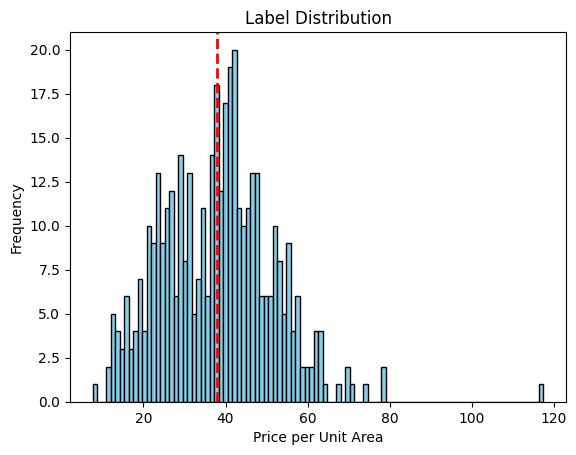

In [2]:
# Get the label column
label = data[data.columns[-1]]

# Visualize the label distribution using a histogram
import matplotlib.pyplot as plt

plt.hist(data['price_per_unit'], bins=100, color='skyblue', edgecolor='black')
plt.axvline(data['price_per_unit'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Price per Unit Area')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()


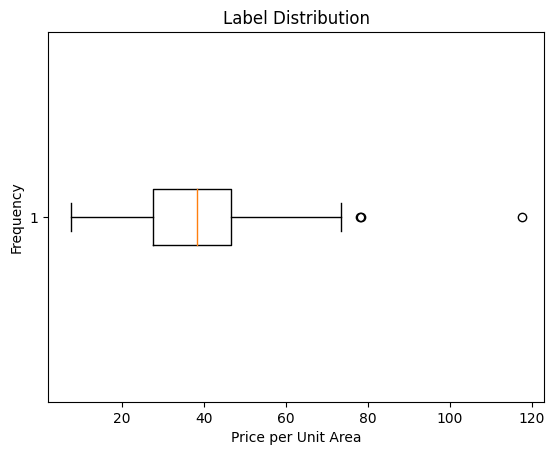

In [3]:
# Visualize the label distribution using a boxplot
import matplotlib.pyplot as plt

plt.boxplot(data['price_per_unit'], vert = False)
plt.xlabel('Price per Unit Area')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()


In [4]:
# Remove outliers
import numpy as np

# Calculate z-scores
z_scores = np.abs((data['price_per_unit'] - data['price_per_unit'].mean()) / data['price_per_unit'].std())

# Define threshold
threshold = 3

# Filter outliers
data = data[z_scores < threshold]

# Reset index
data.reset_index(drop=True, inplace=True)

# Check the updated dataframe
data.head()


,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


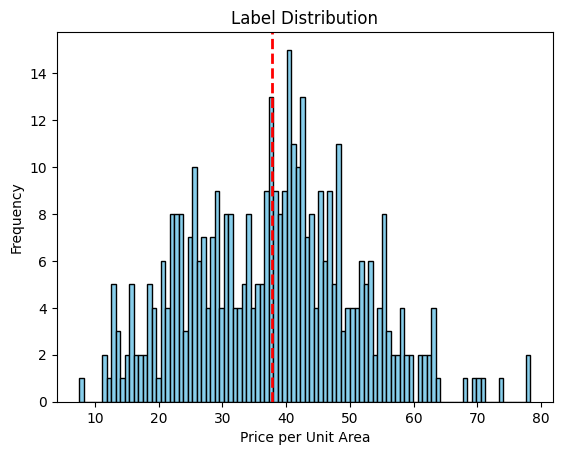

In [5]:
# Visualize the label distribution using a histogram
import matplotlib.pyplot as plt

plt.hist(data['price_per_unit'], bins=100, color='skyblue', edgecolor='black')
plt.axvline(data['price_per_unit'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Price per Unit Area')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()


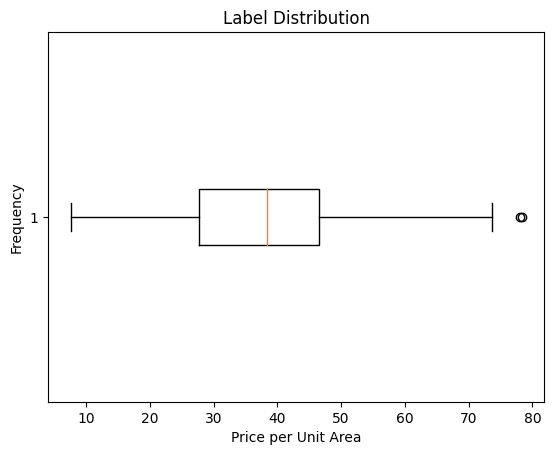

In [6]:
# Visualize the label distribution using a boxplot
import matplotlib.pyplot as plt

plt.boxplot(data['price_per_unit'], vert = False)
plt.xlabel('Price per Unit Area')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()


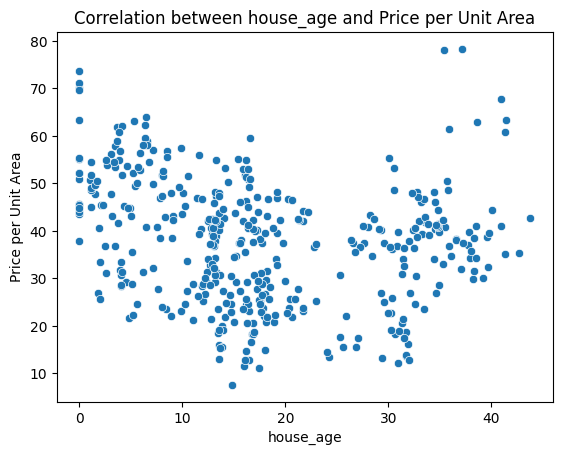

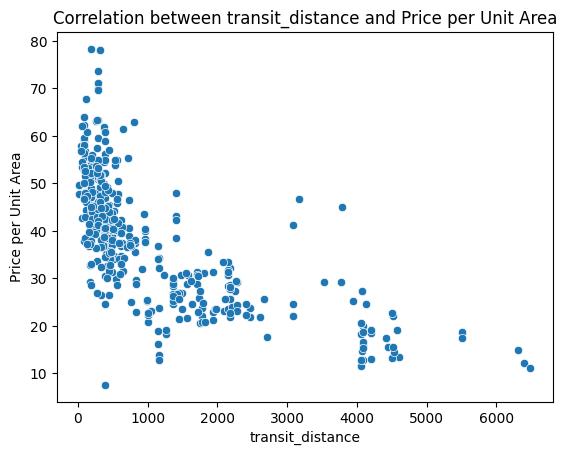

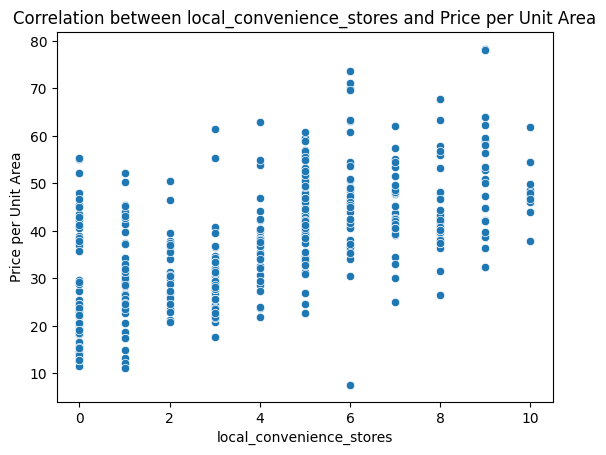

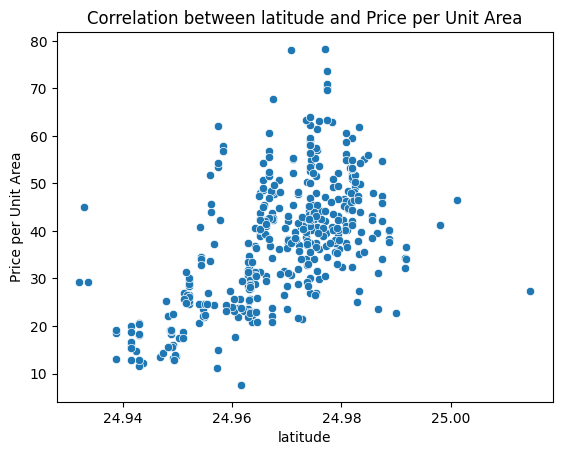

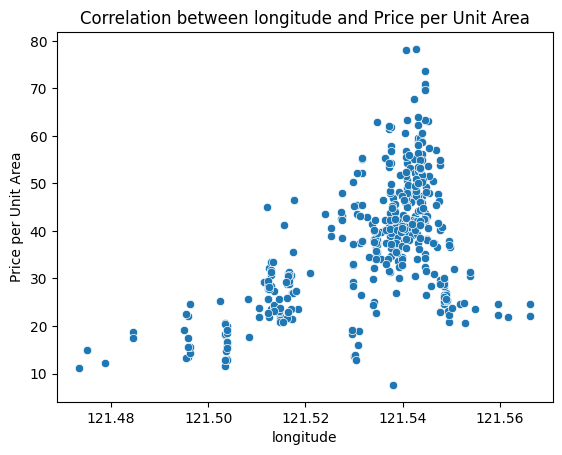

In [7]:
# Visualize the correlation between label distribution and other numeric variables
import seaborn as sns

numeric_vars = ['house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']

for var in numeric_vars:
    sns.scatterplot(x=data[var], y=data['price_per_unit'])
    plt.xlabel(var)
    plt.ylabel('Price per Unit Area')
    plt.title(f'Correlation between {var} and Price per Unit Area')
    plt.show()


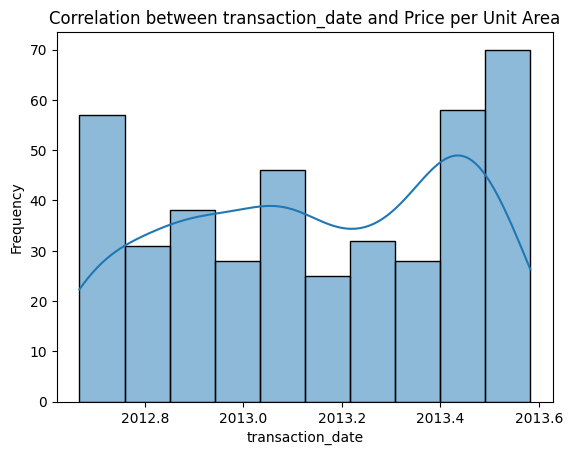

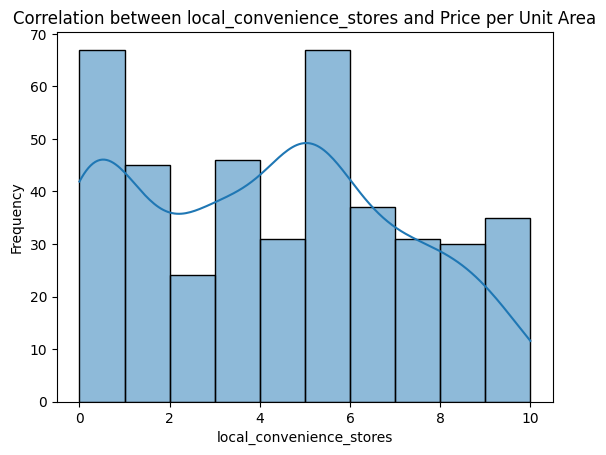

In [8]:
# Visualize the correlation between label distribution and categorical features using a histogram
import seaborn as sns

categorical_vars = ['transaction_date', 'local_convenience_stores']

for var in categorical_vars:
    sns.histplot(data[var], bins=10, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Correlation between {var} and Price per Unit Area')
    plt.show()


In [9]:
from sklearn.model_selection import train_test_split

# Separate features and label
X = data.drop('price_per_unit', axis=1)  # Specify axis=1 to drop column
y = data['price_per_unit']

# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_val.shape[0]))

Training Set: 289 rows
Test Set: 124 rows


In [10]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = ['house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude',
                                                   'longitude'])])),
                ('regressor', RandomForestRegressor())])


In [11]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the validation set
y_pred = model.predict(X_val[numeric_features])

# Calculate evaluation metrics

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print('Mean Squared Error:', mse)
print("RMSE:", rmse)
print('R^2 Score:', r2)


Mean Squared Error: 46.75117501957518
RMSE: 6.837483090990074
R^2 Score: 0.7219447820584478


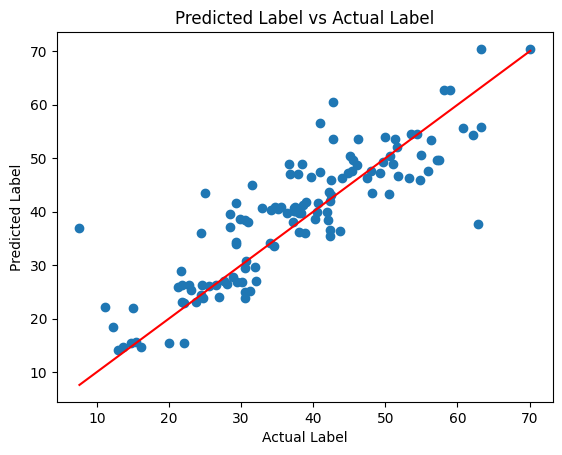

In [12]:
# Plot predicted label vs actual label
import matplotlib.pyplot as plt

plt.scatter(y_val, y_pred)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Predicted Label vs Actual Label')
plt.show()


## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [0]:
import joblib
import numpy as np

# Save the model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump(model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

ValueError: X has 5 features, but ColumnTransformer is expecting 6 features as input.